
#Campus Placement Prediction

The goal of this assignment is to develop and evaluate predictive classifier models to determine a student's placement status based on a variety of academic and extracurricular features. The dataset includes factors such as CGPA, internship experience, project involvement, and other relevant attributes. By building and comparing three distinct machine learning models — Logistic Regression, Decision Tree, and K-Nearest Neighbors (KNN) — you will assess which model best predicts whether a student will be placed or not

In [ ]:
#Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Dataset link :
df = pd.read_csv("https://raw.githubusercontent.com/ArchanaInsights/Datasets/main/campus_placement.csv")

#Machine Learning Model Building Steps:-

##Data Preprocessing:

#Load the Dataset

In [ ]:
df.head()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
1,2,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
2,3,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
3,4,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
4,5,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed


In [ ]:
#dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  10000 non-null  int64  
 1   CGPA                       10000 non-null  float64
 2   Internships                10000 non-null  int64  
 3   Projects                   10000 non-null  int64  
 4   Workshops/Certifications   10000 non-null  int64  
 5   AptitudeTestScore          10000 non-null  int64  
 6   SoftSkillsRating           10000 non-null  float64
 7   ExtracurricularActivities  10000 non-null  object 
 8   PlacementTraining          10000 non-null  object 
 9   SSC_Marks                  10000 non-null  int64  
 10  HSC_Marks                  10000 non-null  int64  
 11  PlacementStatus            10000 non-null  object 
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB


###In the dataset:

-->Rows are 10000

-->Column are 12

In [ ]:
#Sumaary of descriptive statistics
df.describe()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,SSC_Marks,HSC_Marks
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,7.698010,1.049200,2.026600,1.013200,79.449900,4.323960,69.159400,74.501500
std,2886.89568,0.640131,0.665901,0.867968,0.904272,8.159997,0.411622,10.430459,8.919527
min,1.00000,6.500000,0.000000,0.000000,0.000000,60.000000,3.000000,55.000000,57.000000
25%,2500.75000,7.400000,1.000000,1.000000,0.000000,73.000000,4.000000,59.000000,67.000000
50%,5000.50000,7.700000,1.000000,2.000000,1.000000,80.000000,4.400000,70.000000,73.000000
75%,7500.25000,8.200000,1.000000,3.000000,2.000000,87.000000,4.700000,78.000000,83.000000
max,10000.00000,9.100000,2.000000,3.000000,3.000000,90.000000,4.800000,90.000000,88.000000


#Handle Missing Values:

In [ ]:
df.isna().sum()

,0
StudentID,0
CGPA,0
Internships,0
Projects,0
Workshops/Certifications,0
AptitudeTestScore,0
SoftSkillsRating,0
ExtracurricularActivities,0
PlacementTraining,0
SSC_Marks,0


    In the dataset No missing value

In [ ]:
df.columns

Index(['StudentID', 'CGPA', 'Internships', 'Projects',
       'Workshops/Certifications', 'AptitudeTestScore', 'SoftSkillsRating',
       'ExtracurricularActivities', 'PlacementTraining', 'SSC_Marks',
       'HSC_Marks', 'PlacementStatus'],
      dtype='object')

#Encode Categorical Features:

In [ ]:
from sklearn.preprocessing import LabelEncoder
Categorical_Features = ['ExtracurricularActivities', 'PlacementTraining', 'PlacementStatus']
le = LabelEncoder()
for col in Categorical_Features:
  df[col] = le.fit_transform(df[col])
df

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,0,0,61,79,0
1,2,8.9,0,3,2,90,4.0,1,1,78,82,1
2,3,7.3,1,2,2,82,4.8,1,0,79,80,0
3,4,7.5,1,1,2,85,4.4,1,1,81,80,1
4,5,8.3,1,2,2,86,4.5,1,1,74,88,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,7.5,1,1,2,72,3.9,1,0,85,66,0
9996,9997,7.4,0,1,0,90,4.8,0,0,84,67,1
9997,9998,8.4,1,3,0,70,4.8,1,1,79,81,1
9998,9999,8.9,0,3,2,87,4.8,1,1,71,85,1


In [ ]:
df['ExtracurricularActivities'].unique()
print('No - 0')
print('yes - 1')

No - 0
yes - 1


In [ ]:
df['PlacementTraining'].unique()
print('No - 0')
print('yes - 1')

No - 0
yes - 1


In [ ]:
le.classes_

array(['NotPlaced', 'Placed'], dtype=object)

In [ ]:
list(enumerate(le.classes_))

[(0, 'NotPlaced'), (1, 'Placed')]

#Feature Selection:

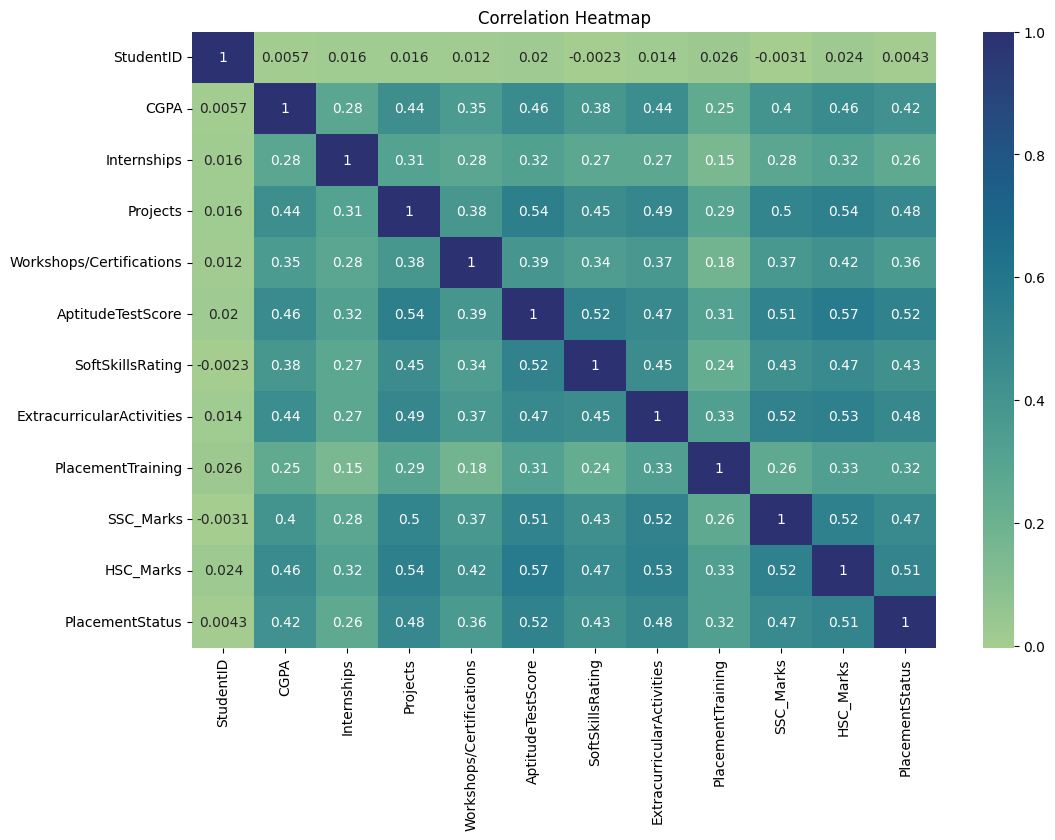

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="crest")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
X = df.drop(columns=['PlacementStatus','StudentID']) #feature
y = df['PlacementStatus'] # Target

In [ ]:
X

,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks
0,7.5,1,1,1,65,4.4,0,0,61,79
1,8.9,0,3,2,90,4.0,1,1,78,82
2,7.3,1,2,2,82,4.8,1,0,79,80
3,7.5,1,1,2,85,4.4,1,1,81,80
4,8.3,1,2,2,86,4.5,1,1,74,88
...,...,...,...,...,...,...,...,...,...,...
9995,7.5,1,1,2,72,3.9,1,0,85,66
9996,7.4,0,1,0,90,4.8,0,0,84,67
9997,8.4,1,3,0,70,4.8,1,1,79,81
9998,8.9,0,3,2,87,4.8,1,1,71,85


#Data Splitting:

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#Split the dataset into training and testing sets (e.g., 80% training, 20% testing).
X_train, X_test, y_train, y_test  = train_test_split(X,y,test_size=0.2, random_state=42)
print(f"Dataset shape : {df.shape}")
print(f"X_train shape : {X_train.shape}")
print(f"X_test shape : {X_test.shape}")
print(f"y_train shape : {y_train.shape}")
print(f"y_test shape : {y_test.shape}")

Dataset shape : (10000, 12)
X_train shape : (8000, 10)
X_test shape : (2000, 10)
y_train shape : (8000,)
y_test shape : (2000,)


#Feature Scaling:

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Logistic Regression - Model Building and Evaluation:

#Model Building:
#Model Evaluation:

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
# Try different values for max_iter
max_iters = [100, 200, 300, 500]

for i in max_iters:
    print(f"\nLogistic Regression with max_iter = {i}")
    print("_"*40)
    model = LogisticRegression(max_iter=i, random_state=42)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    # Model Evaluation:
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")


Logistic Regression with max_iter = 100
________________________________________
Accuracy: 0.7945

Logistic Regression with max_iter = 200
________________________________________
Accuracy: 0.7945

Logistic Regression with max_iter = 300
________________________________________
Accuracy: 0.7945

Logistic Regression with max_iter = 500
________________________________________
Accuracy: 0.7945


#Decision Tree - Model Building and Evaluation:

#Model Building:
#Model Evaluation:

In [ ]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [ ]:
depths = [2, 3, 4, 5, 10, None]
for depth in depths:
    print(f"\nDecision Tree with max_depth = {depth}")
    print("_"*35)

    # Create Decision Tree Classifier with entropy
    clf = DecisionTreeClassifier(criterion="entropy", max_depth=depth, random_state=42)
    clf.fit(X_train_scaled, y_train)

    y_pred = clf.predict(X_test_scaled)

    #	Model Evaluation:
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model Accuracy: {accuracy:.4f}")


Decision Tree with max_depth = 2
___________________________________
Model Accuracy: 0.7435

Decision Tree with max_depth = 3
___________________________________
Model Accuracy: 0.7770

Decision Tree with max_depth = 4
___________________________________
Model Accuracy: 0.7815

Decision Tree with max_depth = 5
___________________________________
Model Accuracy: 0.7810

Decision Tree with max_depth = 10
___________________________________
Model Accuracy: 0.7660

Decision Tree with max_depth = None
___________________________________
Model Accuracy: 0.7345


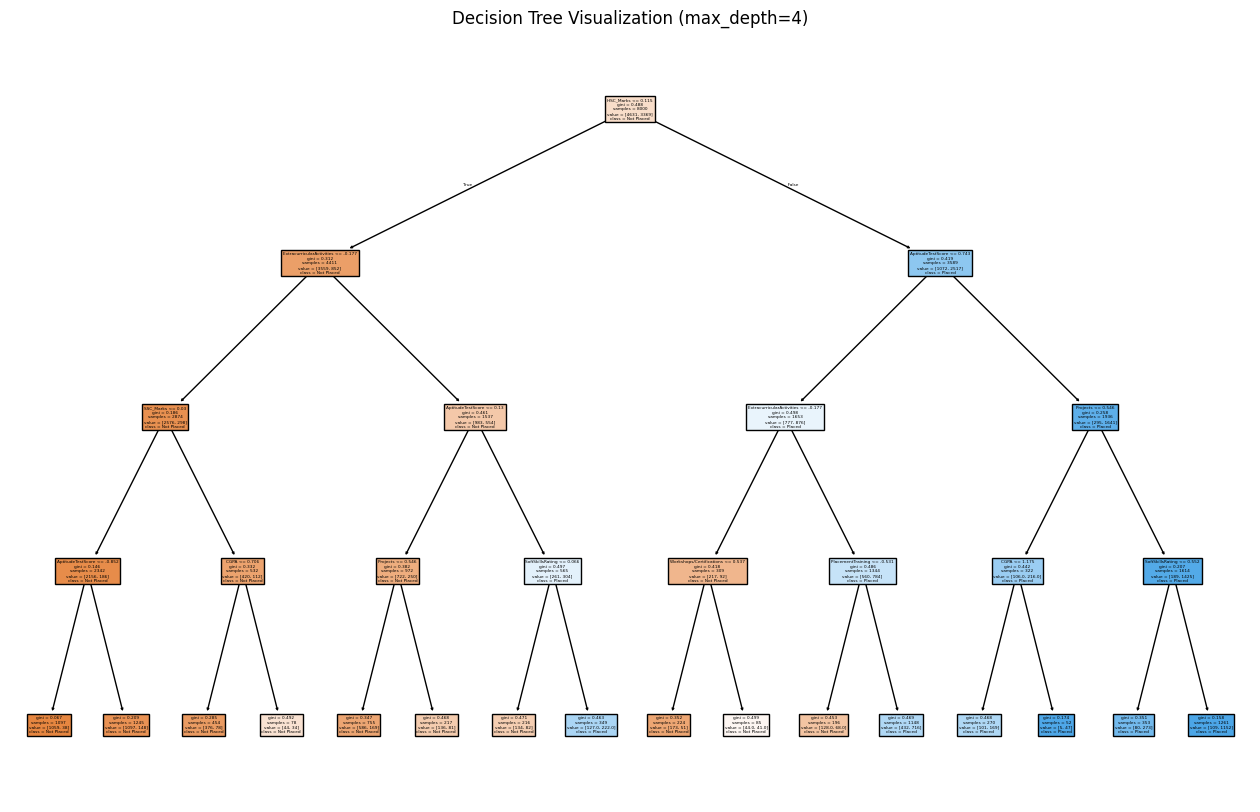

In [ ]:
best_tree = DecisionTreeClassifier(max_depth=4, random_state=42)
best_tree.fit(X_train_scaled, y_train)

plt.figure(figsize=(16, 10))
plot_tree(best_tree, feature_names=X.columns, class_names=["Not Placed", "Placed"], filled=True)
plt.title("Decision Tree Visualization (max_depth=4)")
plt.show()

#K-Nearest Neighbors (KNN) - Model Building and Evaluation:

##Model Building:



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
k_values = [1, 3, 5, 11]
accuracies = {}

for k in k_values:
    print(f"\nKNN with k = {k}")
    print("_"*20)
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)

    y_pred = knn.predict(X_test_scaled)

    #Model Evaluation:
    acc = accuracy_score(y_test, y_pred)
    accuracies[k] = acc
    print(f"Accuracy: {acc:.4f}")


KNN with k = 1
____________________
Accuracy: 0.7355

KNN with k = 3
____________________
Accuracy: 0.7580

KNN with k = 5
____________________
Accuracy: 0.7720

KNN with k = 11
____________________
Accuracy: 0.7890


#Reporting:

In [ ]:
print("\nK Value vs Accuracy")
for k, acc in accuracies.items():
    print(f"k = {k}: Accuracy = {acc:.4f}")

best_k = max(accuracies, key=accuracies.get)
print(f"\nBest k: {best_k} with Accuracy = {accuracies[best_k]:.4f}")


K Value vs Accuracy
k = 1: Accuracy = 0.7355
k = 3: Accuracy = 0.7580
k = 5: Accuracy = 0.7720
k = 11: Accuracy = 0.7890

Best k: 11 with Accuracy = 0.7890


#Comparison and Analysis:
### Compare the accuracy scores of the three models.
Model - Logistic Regression :

Parameters Used [max_iter = 100–500]

Best Accuracy = 0.7945
___
Model - Decision Tree :

Parameters Used [max_depth = 4]

Best Accuracy = 0.7815
____
Model - K-Nearest Neighbors :

Parameters Used [k = 11]

Best Accuracy = 0.7890
____
- Logistic Regression produced consistent results across all iterations.

- Decision Tree performed best at max_depth = 4.

- KNN performed best with k = 11.

###	Discuss which model performed best and why, based on the accuracy scores and other relevant factors.
- Logistic Regression was the best-performing model based on its highest accuracy score of ***0.7945*** and its consistent, stable performance across the dataset.
- While K-Nearest Neighbors and Decision Tree also performed well, they did not surpass the performance of Logistic Regression and may be more sensitive to noise or prone to overfitting.

#	Reflect on the strengths and weaknesses of each model in the context of this dataset.
 Logistic Regression

Strengths:

- Achieved the highest accuracy (0.7945).

- Performs well when there is a linear relationship between features and the target.

- Fast and computationally efficient, even with large datasets.

- Easy to interpret and implement.

Weaknesses:

- Assumes a linear decision boundary, which may not capture complex patterns.

- Performance may decrease if the dataset contains non-linear relationships or highly correlated features.

K-Nearest Neighbors (KNN)

Strengths:

- Simple and intuitive algorithm.

- Makes no assumptions about data distribution (non-parametric).

- Can capture non-linear relationships between features and target.

Weaknesses:

- Slightly lower accuracy (0.7890).

- Computationally expensive during prediction, especially with large datasets.

- Sensitive to noisy data and feature scaling.

- Choice of 'k' value greatly affects performance.

 Decision Tree

Strengths:

- Easy to visualize and interpret.

- Handles both numerical and categorical features well.

- Captures non-linear relationships effectively.

- No need for feature scaling or normalization.

Weaknesses:

- Lowest accuracy among the three (0.7815).

- Prone to overfitting, especially on small or imbalanced datasets.

- Less stable – small data changes can result in a completely different tree.

